# Python for Researchers
[www.pythonforresearchers.com](http://pythonforresearchers.com)

[@py4res](https://twitter.com/py4res)

## Data handling and visualisaction mini series

1. Getting data direct from the web
2. Plotting data (using Matplotlib)
3. Making your plot look awesome
4. Making your plot interactive (Plotly)
5. Cool Jupyter Notebook functionality

## You are going to make this!

<img src="world_population.png">

## Part 1: Getting data direct from the web

In [2]:
# import pandas
import pandas as pd

In [3]:
# Read data into pandas datafrom direct from the web
URL = "https://en.wikipedia.org/wiki/World_population"
df = pd.read_html(URL, header=0, index_col=0)[8]

In [4]:
# Filter the columns - historical data only
df_filtered = df[df.columns[0: 12]]

In [5]:
# Tidy up index
index = df_filtered.index.values
df_filtered.index = [x.replace("[Note 1]", "") for x in index]
df_filtered

,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012
World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052
Africa,86,114,106,106,107,111,133,221,783,973,1022,1052
Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250
Europe,168,170,178,190,203,276,408,547,675,732,738,740
Latin America,40,20,10,16,24,38,74,167,508,577,590,603
North America,6,3,2,2,7,26,82,172,312,337,345,351
Oceania,3,3,3,2,2,2,6,13,30,34,37,38


In [6]:
# Sort table according to 2012 population
df_filtered.sort_values(by=['2012'], ascending=False)

,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012
World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052
Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250
Africa,86,114,106,106,107,111,133,221,783,973,1022,1052
Europe,168,170,178,190,203,276,408,547,675,732,738,740
Latin America,40,20,10,16,24,38,74,167,508,577,590,603
North America,6,3,2,2,7,26,82,172,312,337,345,351
Oceania,3,3,3,2,2,2,6,13,30,34,37,38


In [7]:
# Save table to excel spreadsheet
df_filtered.to_excel("world_population.xlsx")

## Part 2: Generating a basic plot

In [8]:
# import matplotlib
import matplotlib.pyplot as plt

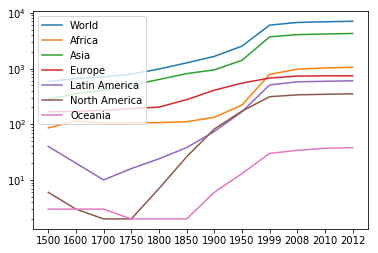

In [9]:
# Setup figure and axis
fig, ax = plt.subplots()

# Plot each row as a line

for row in df_filtered.iterrows():
    ax.plot(row[1], label= row[0])

# Set title and axis labels

# Include a legend

# Use a logarithmic y scale
ax.set_yscale('log')
    
ax.legend(loc='upper left')

# Don't forget to show your figure
plt.show()
    

## Part 3: Making your plot look awesome

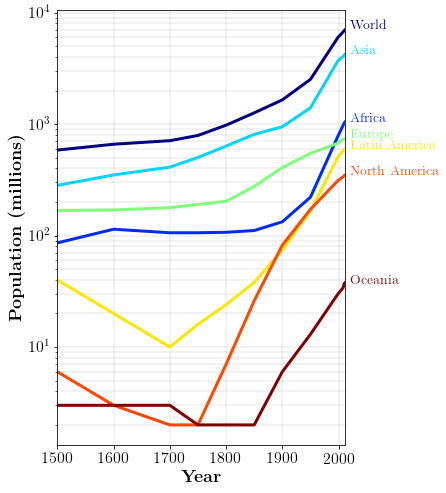

In [12]:
# set height and width
height=8
width=0.8*height

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(width,height))

# set ticks fontsize
ax.tick_params(axis='both', labelsize=16)

# make x-axis values integers
year = df_filtered.columns.values
df_filtered.columns = list(map(int, year))

# set axis limits
ax.set_xlim(1500, 2012)

# set axis labels and title
#ax.set_xlabel('Year', fontsize=16)
#ax.set_ylabel('Population (millions)', fontsize=16)
ax.set_xlabel(r'$\textbf{Year}$', fontsize=18)
ax.set_ylabel(r"$\textbf{Population (millions)}$", fontsize=18)
#ax.set_title('Historical World Population', fontsize=16)

# set gridlines
ax.grid(which='both', linewidth='0.2', color='grey')

# set custom colours
colors = plt.cm.jet(np.linspace(0,1,len(df_filtered)))

# adjust subplot margins to allow text on right of graph
fig.subplots_adjust(right=0.75)

for i, row in enumerate(df_filtered.iterrows()):
    ax.plot(row[1], label= row[0], linewidth=3, color=colors[i])
    # find y value of final values in '2012' column
    y_pos = row[1].values[-1]-1.5
    ax.text(2020, y_pos, row[1].name, fontsize=14, color=colors[i])
    
ax.set_yscale('log')

#plt.text(1480, 0.5, "World Population, Wikipedia Article.\n" +
         #"https://en.wikipedia.org/wiki/World_population. " +
         #"[Last Accessed: 12 April 2019]", fontsize=11, ha="left")
    
#plt.legend(loc='upper left', fontsize=14)
    
plt.show()

In [11]:
fig.savefig("world_population.eps", format="eps")

ValueError: 
\textbf{Year}
^
Unknown symbol: \textbf (at char 0), (line:1, col:1)

In [ ]:
year = df_filtered.columns.values
df_filtered.columns = list(map(int, year))

In [ ]:
import numpy as np
height = 10
width = 0.66*height

fig, ax = plt.subplots(figsize = (width, height))

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

ax.set_yscale('log')

year = df.columns.tolist()
year = list(map(int, year))

colors = plt.cm.rainbow(np.linspace(0,1,len(df)))

ax.set_title("Historical World Population: 1500 - 2012", fontsize=16)
ax.set_xlim(1500, 2012)
ax.set_ylabel('Population (millions)', fontsize=14)#ax.set_xlabel('Year', fontsize=14)
ax.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
ax.grid(which='major', linestyle='-', linewidth='0.2', color='grey', axis='y')

for i, row in enumerate(df.iterrows()):
    #ax.plot(year, row[1])
    ax.plot(year, row[1], label=row[1].name.replace("[Note 1]", ""), linewidth='3', color=colors[i])
    y_pos = row[1][-3] - 0.5 
    print(row[1])
    ax.text(2020, y_pos, row[1].name.replace("[Note 1]", "")+ ", "+str(y_pos), fontsize=14, color=colors[i])

#plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")    
#plt.legend(loc="upper left")

plt.text(1480, 0.5, "World Population, Wikipedia Article.\n" +
         "https://en.wikipedia.org/wiki/World_population. " +
         "[Last Accessed: 12 April 2019]", fontsize=11, ha="left")  

plt.show()